Concepts we will be covering in this notebook

* Bagging 

## Creating the dataset

Let's create a dataset containing data from 4 different classes. The variation occurs across two dimensions X0 and X1.

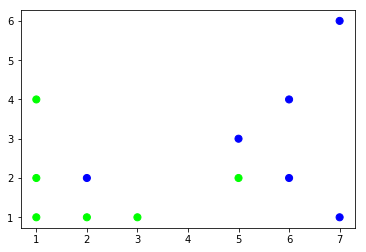

In [37]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

X = np.array([[7, 6], [6, 4], [5, 3], [5, 2], [6, 2], [7, 1], [3, 1], [2, 1], [2, 2], [1, 1], [1, 2], [1, 4]])
y = np.array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

test_X = np.array([[5, 1], [2, 3]])
test_y = np.array([0, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg');

In [23]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/Users/nipun/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


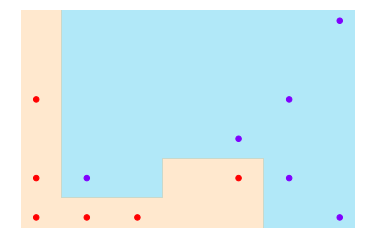

In [56]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=10, criterion='entropy').fit(X, y)
visualize_classifier(tree, X, y)


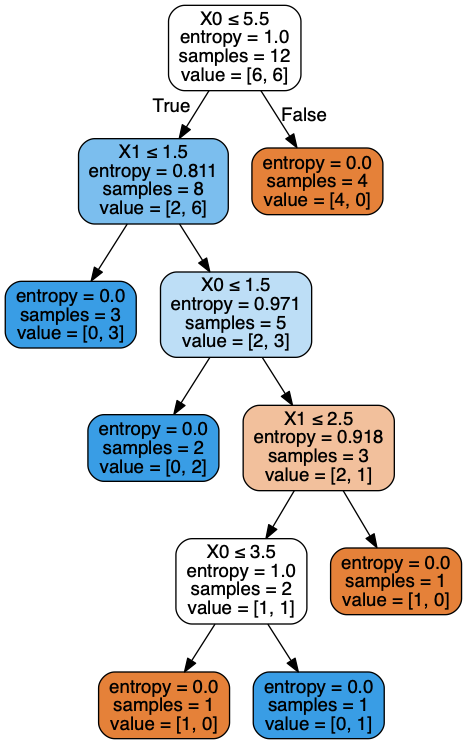

In [57]:
from IPython.display import Image  
from io import StringIO
import pydot
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,  
                       
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  [0]
Image(graph.create_png())  

In [58]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5), value=5), Output()), _do…

In [59]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

In [66]:
bag_class = BaggingClassifier(base_estimator=tree, n_estimators=3)

In [67]:
bag_class.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=3, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [68]:
tree.predict(test_X)
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(test_y,tree.predict(test_X))

array([[0, 1],
       [1, 0]])

In [70]:
confusion_matrix(test_y,bag_class.predict(test_X))

array([[0, 1],
       [1, 0]])

In [74]:
helpers_05_08.plot_tree_interactive(X[bag_class.estimators_samples_[0]], y[bag_class.estimators_samples_[0]])

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5), value=5), Output()), _do…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

In [75]:
helpers_05_08.plot_tree_interactive(X[bag_class.estimators_samples_[1]], y[bag_class.estimators_samples_[1]])

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5), value=5), Output()), _do…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

In [76]:
helpers_05_08.plot_tree_interactive(X[bag_class.estimators_samples_[2]], y[bag_class.estimators_samples_[2]])

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5), value=5), Output()), _do…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>